In [17]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from torchvision import models

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

test_dataset = torchvision.datasets.ImageFolder(root='dataset_horse_vs_panda/generated', transform=transform)
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False)

In [12]:
def test(model, test_loader):
    for i, data in enumerate(test_loader, 0):
        inputs, labels = data
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        print('Predicted: ', ' '.join('%5s' % predicted[j] for j in range(4)))
        print('Ground Truth: ', ' '.join('%5s' % labels[j] for j in range(4)))
        print('')
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 4, 1)
        plt.imshow(inputs[0].permute(1, 2, 0))
        plt.title("Predicted: " + str(predicted[0].item()) + " Ground Truth: " + str(labels[0].item()))
        plt.subplot(1, 4, 2)
        plt.imshow(inputs[1].permute(1, 2, 0))
        plt.title("Predicted: " + str(predicted[1].item()) + " Ground Truth: " + str(labels[1].item()))
        plt.subplot(1, 4, 3)
        plt.imshow(inputs[2].permute(1, 2, 0))
        plt.title("Predicted: " + str(predicted[2].item()) + " Ground Truth: " + str(labels[2].item()))
        plt.subplot(1, 4, 4)
        plt.imshow(inputs[3].permute(1, 2, 0))
        plt.title("Predicted: " + str(predicted[3].item()) + " Ground Truth: " + str(labels[3].item()))
        plt.show()

In [4]:
class vgg_1_block(nn.Module):
    def __init__(self):
        super(vgg_1_block, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
        self.relu1 = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(32 * 112 * 112, 128)
        self.fc2 = nn.Linear(128, 2)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.maxpool1(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.fc2(x)
        return x

vgg1b = vgg_1_block()
vgg1b.load_state_dict(torch.load('vgg1b.pt', map_location=torch.device('cpu')))

C:\Users\Harshil Shah\AppData\Local\Temp\ipykernel_22976\1556983037.py:20: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  vgg1b.load_state_dict(torch.load('vgg1b.pt', map_loc

<All keys matched successfully>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.99215686].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.99215686..0.9843137].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.9843137].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.99215686].


Predicted:  tensor(0) tensor(1) tensor(1) tensor(1)
Ground Truth:  tensor(0) tensor(0) tensor(1) tensor(1)



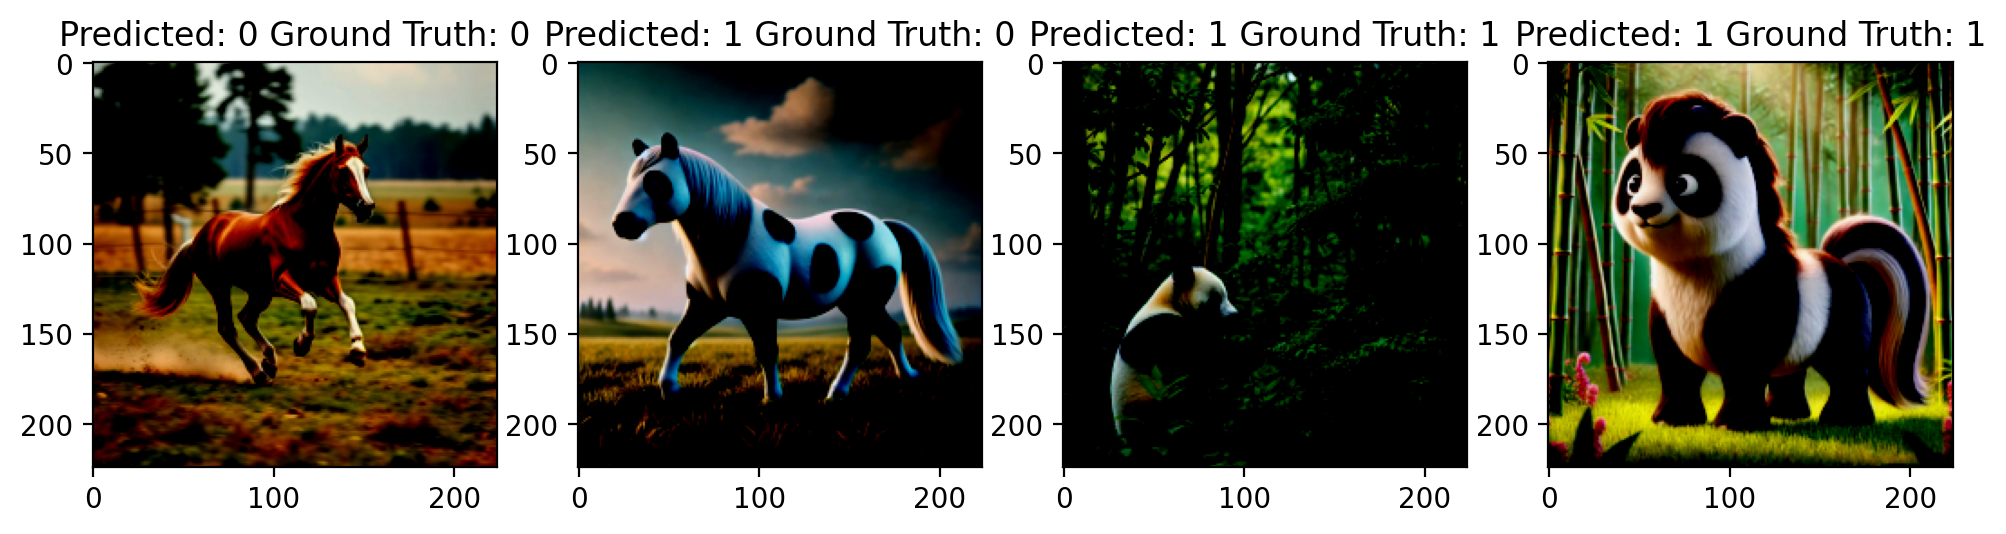

In [13]:
test(vgg1b, test_loader)

In [14]:
class vgg_3_block(nn.Module):
    def __init__(self):
        super(vgg_3_block, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
        self.relu1 = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.relu2 = nn.ReLU()
        self.maxpool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.relu3 = nn.ReLU()
        self.maxpool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(128 * 28 * 28, 128)
        self.fc2 = nn.Linear(128, 2)

    def forward(self,x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.maxpool1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.maxpool2(x)
        x = self.conv3(x)
        x = self.relu3(x)
        x = self.maxpool3(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.fc2(x)
        return x

vgg3b = vgg_3_block()
vgg3b.load_state_dict(torch.load('vgg3b.pt', map_location=torch.device('cpu')))

C:\Users\Harshil Shah\AppData\Local\Temp\ipykernel_22976\2032442671.py:32: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  vgg3b.load_state_dict(torch.load('vgg3b.pt', map_loc

<All keys matched successfully>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.99215686].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.99215686..0.9843137].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.9843137].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.99215686].


Predicted:  tensor(0) tensor(1) tensor(1) tensor(1)
Ground Truth:  tensor(0) tensor(0) tensor(1) tensor(1)



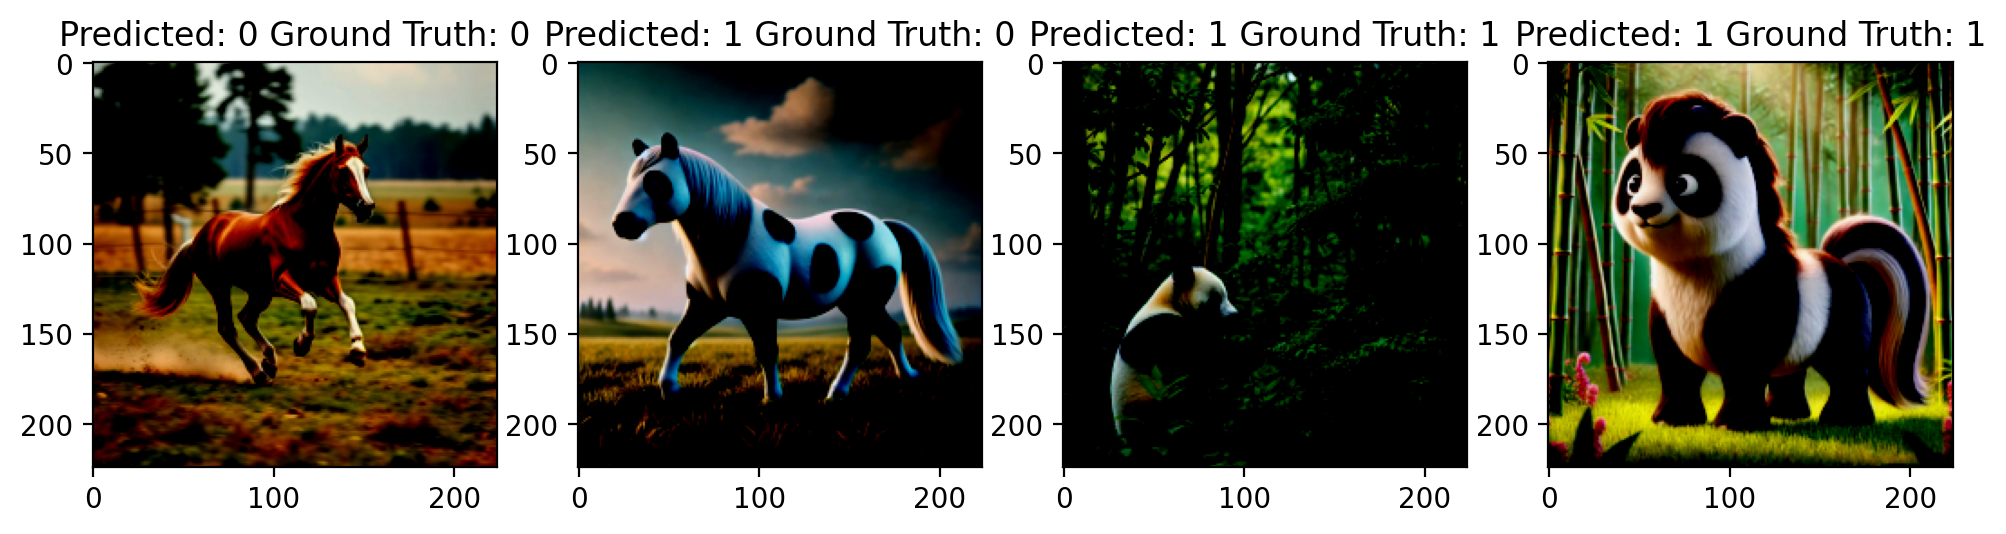

In [15]:
test(vgg3b, test_loader)

C:\Users\Harshil Shah\AppData\Local\Temp\ipykernel_22976\1109895927.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  vgg3b_aug.load_state_dict(torch.load('vgg3b_aug.pt', 

Predicted:  tensor(0) tensor(1) tensor(1) tensor(1)
Ground Truth:  tensor(0) tensor(0) tensor(1) tensor(1)



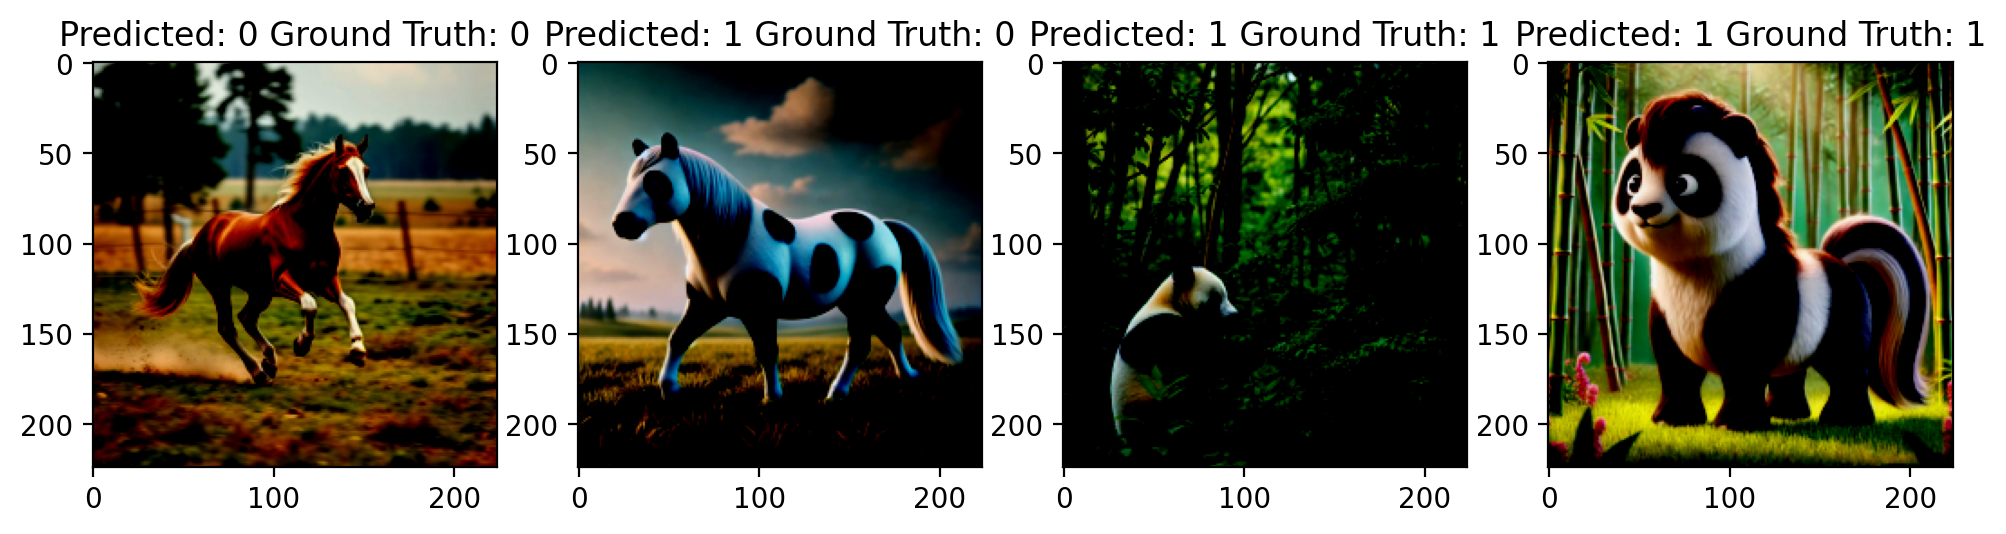

In [16]:
vgg3b_aug = vgg_3_block()
vgg3b_aug.load_state_dict(torch.load('vgg3b_aug.pt', map_location=torch.device('cpu')))
test(vgg3b_aug, test_loader)

e:\ML\ES335_Assignment_4\env\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
e:\ML\ES335_Assignment_4\env\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\Harshil Shah\AppData\Local\Temp\ipykernel_22976\1088511640.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/ma

Predicted:  tensor(0) tensor(0) tensor(0) tensor(0)
Ground Truth:  tensor(0) tensor(0) tensor(1) tensor(1)



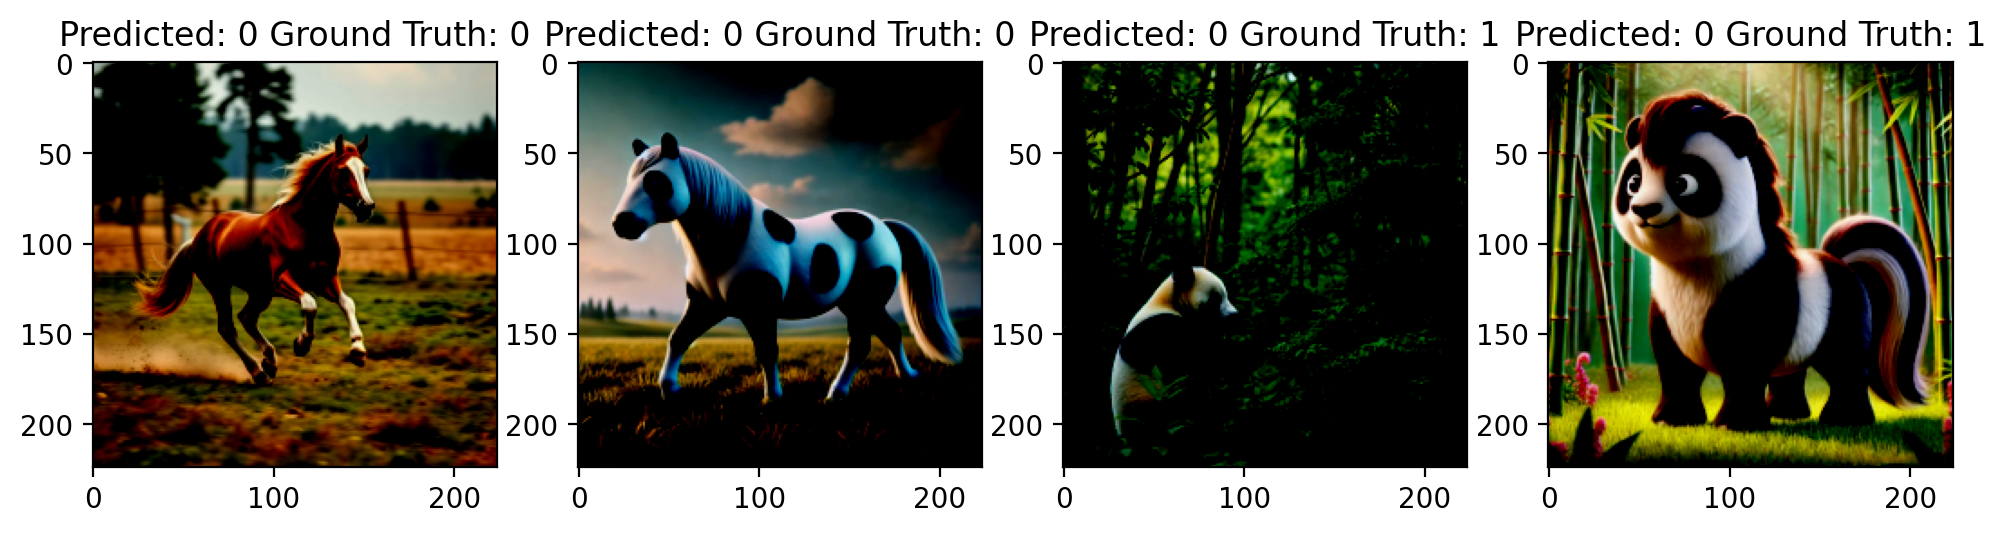

In [18]:
vgg16_all = models.vgg16(pretrained=True)
vgg16_all.classifier[6] = nn.Linear(4096, 2)
vgg16_all.load_state_dict(torch.load('vgg16_all.pt', map_location=torch.device('cpu')))
test(vgg16_all, test_loader)

e:\ML\ES335_Assignment_4\env\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
e:\ML\ES335_Assignment_4\env\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\Harshil Shah\AppData\Local\Temp\ipykernel_22976\886510657.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/mai

Predicted:  tensor(0) tensor(0) tensor(1) tensor(1)
Ground Truth:  tensor(0) tensor(0) tensor(1) tensor(1)



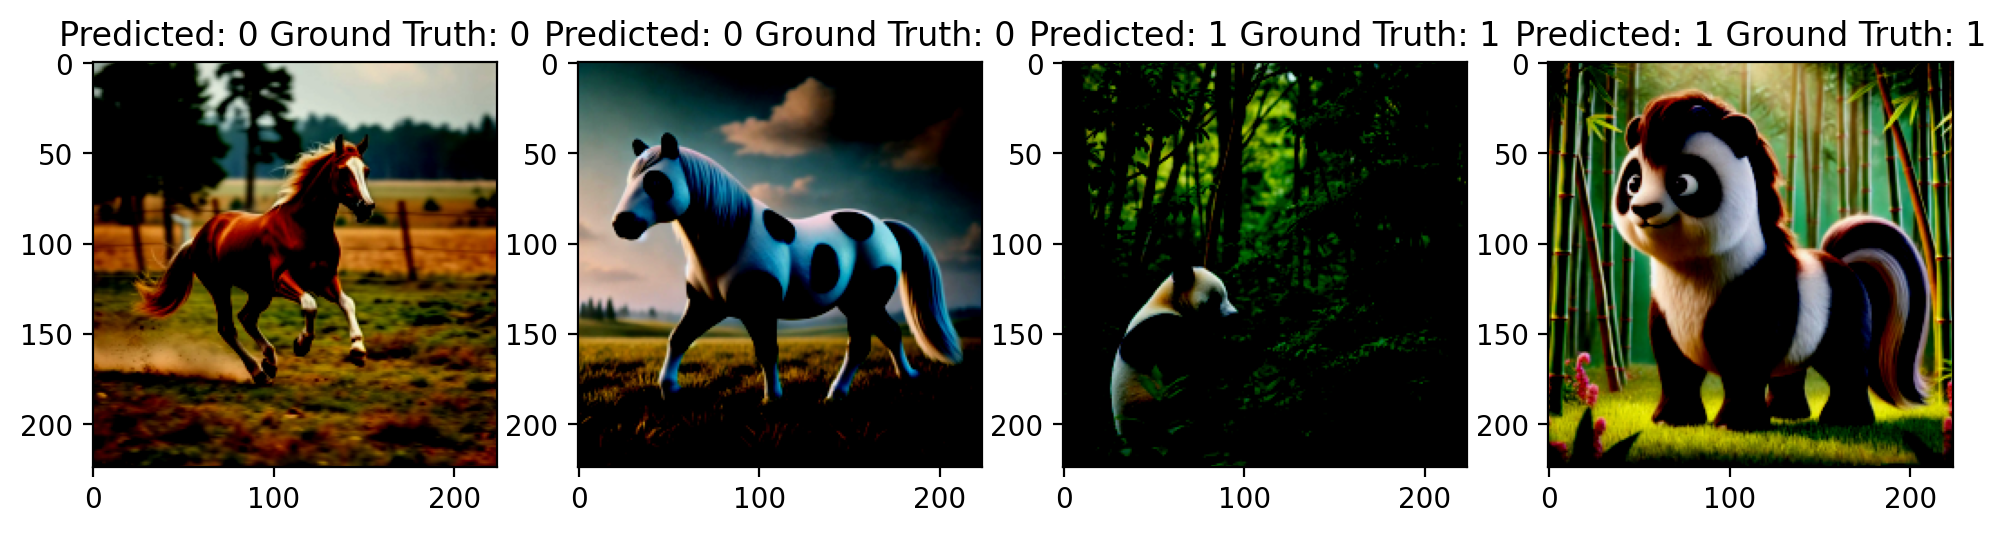

In [19]:
vgg16_final = models.vgg16(pretrained=True)
vgg16_final.classifier[6] = nn.Linear(4096, 2)
vgg16_final.load_state_dict(torch.load('vgg16_final.pt', map_location=torch.device('cpu')))
test(vgg16_final, test_loader)